## Mock Experiments for the Discrete Voter Model

This notebook evaluates the Discrete Voter Model by running experiments on mock elections.

In [211]:
import numpy as np
import pandas as pd
from tqdm.autonotebook import trange, tqdm

In [2]:
import dvm_eval
import dvm_plot
import elect
import tools

In [270]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import seaborn as sns

# Style the plots
sns.set(style='ticks')
matplotlib.rcParams['font.family'] = "Helvetica"

## 2x2

In [3]:
eval_candidates_2d = ['a', 'b']

In [4]:
# 2D evaluation
eval_demo_1 = {'prec_1': {'Group 1': 50, 'Group 2': 50}}
eval_demo_2 = {'prec_1': {'Group 1': 25, 'Group 2': 75}}
eval_demo_3 = {'prec_1': {'Group 1': 10, 'Group 2': 90}}

In [5]:
eval_dvp_1 = {'prec_1': {'Group 1': {'a': 0.5, 'b': 0.5}, 
              'Group 2': {'a': 0.3, 'b': 0.7}}}
eval_dvp_2 = {'prec_1': {'Group 1': {'a': 0.25, 'b': 0.75}, 
              'Group 2': {'a': 0.2, 'b': 0.8}}}

In [6]:
experiments_2d = []

mock_election_1_1 = elect.Election(eval_candidates_2d, 
                                   eval_demo_1, 
                                   demo_vote_prob=eval_dvp_1)
experiments_2d.append((mock_election_1_1, '1_1'))

mock_election_1_2 = elect.Election(eval_candidates_2d, 
                                   eval_demo_1, 
                                   demo_vote_prob=eval_dvp_2)
experiments_2d.append((mock_election_1_2, '1_2'))

mock_election_2_1 = elect.Election(eval_candidates_2d, 
                                   eval_demo_2, 
                                   demo_vote_prob=eval_dvp_1)
experiments_2d.append((mock_election_2_1, '2_1'))

mock_election_2_2 = elect.Election(eval_candidates_2d, 
                                   eval_demo_2, 
                                   demo_vote_prob=eval_dvp_2)
experiments_2d.append((mock_election_2_2, '2_2'))

mock_election_3_1 = elect.Election(eval_candidates_2d, 
                                   eval_demo_3, 
                                   demo_vote_prob=eval_dvp_1)
experiments_2d.append((mock_election_3_1, '3_1'))

mock_election_3_2 = elect.Election(eval_candidates_2d, 
                                   eval_demo_3, 
                                   demo_vote_prob=eval_dvp_2)
experiments_2d.append((mock_election_3_2, '3_2'))

#### Discrete Voter Model

In [7]:
import importlib

In [21]:
importlib.reload(dvm_eval)

<module 'dvm_eval' from '/Users/hakeemangulu/Google Drive/Academic/Senior Spring/Thesis/thesis/code/dvm_eval.py'>

In [22]:
# Initialize experiment variables

n_iter = 3
phc_gran = 10
n_steps = 1000

In [23]:
# Scoring by expectation with a RWM kernel
rwm_expec_2d_df = dvm_eval.batch_dvm_eval(experiments_2d, n_steps, n_iter, phc_gran, hmc=False)

In [24]:
rwm_expec_2d_df['phc_granularity'] = phc_gran
rwm_expec_2d_df['n_steps'] = n_steps

In [25]:
rwm_expec_2d_df

,label,time,mle_phc_mse,mean_phc_mse,phc_granularity,n_steps
0,1_1,17.617202,0.115833,0.182500,10,1000
1,1_2,17.648894,0.036250,0.036250,10,1000
2,2_1,16.719676,0.125833,0.209167,10,1000
3,2_2,16.502960,0.106250,0.106250,10,1000
4,3_1,16.630867,0.039167,0.039167,10,1000
5,3_2,17.156784,0.526250,0.526250,10,1000


In [26]:
rwm_expec_2d_df.to_csv("experiment_results/rwm_expec_2d.csv", index=False)

In [27]:
# Scoring by expectation with a RWM kernel with a high granularity grid
phc_gran = 100
rwm_expec_2d_df_high_gran = dvm_eval.batch_dvm_eval(experiments_2d, n_steps, n_iter, phc_gran, hmc=False)

# Save experiment results
rwm_expec_2d_df_high_gran.to_csv("experiment_results/rwm_expec_2d_high_gran.csv", index=False)

In [28]:
# Scoring by expectation with a RWM kernel with many steps
phc_gran = 10
n_steps = 10000
rwm_expec_2d_df_high_steps = dvm_eval.batch_dvm_eval(experiments_2d, n_steps, n_iter, phc_gran, hmc=False)

# Save experiment results
rwm_expec_2d_df_high_steps.to_csv("experiment_results/rwm_expec_2d_high_steps.csv", index=False)

In [27]:
# Scoring by expectation with an HMC kernel
hmc_expec_2d_df = dvm_eval.batch_dvm_eval(experiments_2d, n_steps, n_iter, phc_gran, hmc=True)

In [43]:
hmc_expec_2d_df['phc_granularity'] = phc_gran
hmc_expec_2d_df['n_steps'] = n_steps

In [44]:
hmc_expec_2d_df.to_csv("experiment_results/hmc_expec_2d.csv", index=False)

In [30]:
# Scoring by probability with a RWM kernel
rwm_prob_2d_df = dvm_eval.batch_dvm_eval(experiments_2d, n_steps, n_iter, phc_gran, hmc=False, expec_scoring=False)

In [45]:
rwm_prob_2d_df['phc_granularity'] = phc_gran
rwm_prob_2d_df['n_steps'] = n_steps

In [46]:
rwm_prob_2d_df.to_csv("experiment_results/rwm_prob_2d.csv", index=False)

In [52]:
phc_gran = 10
n_steps = 1000

# Scoring by probability with an HMC kernel
hmc_prob_2d_df = dvm_eval.batch_dvm_eval(experiments_2d, n_steps, n_iter, phc_gran, hmc=True, expec_scoring=False)

# Save experiment results
hmc_prob_2d_df.to_csv("experiment_results/hmc_prob_2d.csv", index=False)

In [59]:
# Scoring by probability with a RWM kernel with a high granularity grid
n_iter = 1
phc_gran = 100
n_steps = 1000
rwm_prob_2d_df_high_gran = dvm_eval.batch_dvm_eval(experiments_2d, n_steps, n_iter, phc_gran, hmc=False, expec_scoring=False)

# Save experiment results
rwm_prob_2d_df_high_gran.to_csv("experiment_results/rwm_prob_2d_high_gran.csv", index=False)

In [58]:
# Scoring by probability with a RWM kernel with many steps
n_iter = 1
phc_gran = 10
n_steps = 10000
rwm_prob_2d_df_high_steps = dvm_eval.batch_dvm_eval(experiments_2d, n_steps, n_iter, phc_gran, hmc=False, expec_scoring=False)

# Save experiment results
rwm_prob_2d_df_high_steps.to_csv("experiment_results/rwm_prob_2d_high_steps.csv", index=False)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_core/python/ops/control_flow_ops.py", line 2478, in while_loop_v2
    return_same_structure=True)  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_core/python/ops/control_flow_ops.py", line 2757, in while_loop
    return result  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/internal/util.py", line 389, in _body
    return i + 1, state, trace_arrays  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/internal/util.py", line 386, in <listco

#### King's Ecological Inference Method

In [53]:
kei_2d_df = dvm_eval.batch_kei_eval(experiments_2d, n_steps, n_iter)

# Save experiment results
kei_2d_df.to_csv("experiment_results/kei_2d.csv", index=False)

## 3x2
3 demographic groups, 2 candidates

In [62]:
# 3D evaluation
eval_demo_4 = {'Group 1': 50, 'Group 2': 50, 'Group 3': 0}
eval_demo_5 = {'Group 1': 25, 'Group 2': 25, 'Group 3': 50}
eval_demo_6 = {'Group 1': 33, 'Group 2': 33, 'Group 3': 34}

In [63]:
eval_dvp_3 = {'Group 1': {'a': 0.2, 'b': 0.8}, 
              'Group 2': {'a': 0.8, 'b': 0.2}, 
              'Group 3': {'a': 0.4, 'b': 0.6}}
eval_dvp_4 = {'Group 1': {'a': 0.3, 'b': 0.7}, 
              'Group 2': {'a': 0.4, 'b': 0.6}, 
              'Group 3': {'a': 0.5, 'b': 0.5}}

In [266]:
experiments_3d = []

mock_election_4_3 = elect.Election(eval_candidates_2d, 
                                   eval_demo_4, 
                                   demo_vote_prob=eval_dvp_3)
experiments_3d.append((mock_election_4_3, '4_3'))

mock_election_4_4 = elect.Election(eval_candidates_2d, 
                                   eval_demo_4, 
                                   demo_vote_prob=eval_dvp_4)
experiments_3d.append((mock_election_4_4, '4_4'))

mock_election_5_3 = elect.Election(eval_candidates_2d, 
                                   eval_demo_5, 
                                   demo_vote_prob=eval_dvp_3)
experiments_3d.append((mock_election_5_3, '5_3'))

mock_election_5_4 = elect.Election(eval_candidates_2d, 
                                   eval_demo_5, 
                                   demo_vote_prob=eval_dvp_4)
experiments_3d.append((mock_election_5_4, '5_4'))

mock_election_6_3 = elect.Election(eval_candidates_2d, 
                                   eval_demo_6, 
                                   demo_vote_prob=eval_dvp_3)
experiments_3d.append((mock_election_6_3, '6_3'))

mock_election_6_4 = elect.Election(eval_candidates_2d, 
                                   eval_demo_6, 
                                   demo_vote_prob=eval_dvp_4)
experiments_3d.append((mock_election_6_4, '6_4'))

#### Discrete Voter Model

In [267]:
# Scoring by expectation with a RWM kernel
n_iter = 3
phc_gran = 10
n_steps = 1000
rwm_expec_3d_df = dvm_eval.batch_dvm_eval(experiments_3d, n_steps, n_iter, phc_gran, hmc=False)

# Save experiment results
rwm_expec_3d_df.to_csv("experiment_results/rwm_expec_3d.csv", index=False)

In [68]:
# Scoring by expectation with an HMC kernel
n_iter = 3
phc_gran = 10
n_steps = 1000
hmc_expec_3d_df = dvm_eval.batch_dvm_eval(experiments_3d, n_steps, n_iter, phc_gran, hmc=True)

# Save experiment results
hmc_expec_3d_df.to_csv("experiment_results/hmc_expec_3d.csv", index=False)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_core/python/ops/control_flow_ops.py", line 2478, in while_loop_v2
    return_same_structure=True)  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_core/python/ops/control_flow_ops.py", line 2757, in while_loop
    return result  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/internal/util.py", line 389, in _body
    return i + 1, state, trace_arrays  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/internal/util.py", line 386, in <listco

In [70]:
# Scoring by probability with a RWM kernel
n_iter = 1
phc_gran = 10
n_steps = 1000
rwm_prob_3d_df = dvm_eval.batch_dvm_eval(experiments_3d, n_steps, n_iter, phc_gran, hmc=False, expec_scoring=False)

# Save experiment results
rwm_prob_3d_df.to_csv("experiment_results/rwm_prob_3d.csv", index=False)

KeyboardInterrupt: 

In [72]:
# Scoring by probability with an HMC kernel
n_iter = 1
phc_gran = 10
n_steps = 1000
hmc_prob_3d_df = dvm_eval.batch_dvm_eval(experiments_3d, n_steps, n_iter, phc_gran, hmc=True, expec_scoring=False)

# Save experiment results
hmc_prob_3d_df.to_csv("experiment_results/hmc_prob_3d.csv", index=False)

KeyboardInterrupt: 

In [75]:
dvm_eval.dvm_evaluator(experiments_3d[0][0], experiments_3d[0][1], hmc=True, expec_scoring=False, n_steps=200, n_iter=1)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_core/python/ops/control_flow_ops.py", line 2478, in while_loop_v2
    return_same_structure=True)  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_core/python/ops/control_flow_ops.py", line 2757, in while_loop
    return result  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/internal/util.py", line 389, in _body
    return i + 1, state, trace_arrays  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/internal/util.py", line 386, in <listco

KeyboardInterrupt: 

### Experiment Data Cleaning

#### HMC 2D

In [30]:
hmc_expec_2d = pd.read_csv('experiment_results/hmc_expec_2d.csv')

In [32]:
hmc_prob_2d = pd.read_csv('experiment_results/hmc_prob_2d.csv')

In [34]:
hmc_prob_2d['kernel'] = 'prob'

In [35]:
hmc_expec_2d['kernel'] = 'expec'

In [37]:
hmc_2d = pd.concat([hmc_prob_2d, hmc_expec_2d])

In [105]:
cols = ["\multicolumn{1}{c}{Label}", 
        "\multicolumn{1}{c}{Time (s)}", 
        "\multicolumn{1}{c}{MLE PHC MSE}", 
        "\multicolumn{1}{c}{Mean PHC MSE}", 
        "\multicolumn{1}{c}{$g$}", 
        "\multicolumn{1}{c}{$t$}", 
        "\multicolumn{1}{c}{kernel}"]

In [106]:
format_f = lambda x: "$" + "{:0.4f}".format(x) + "$"
format_i = lambda x: "$" + str(x) + "$"

def format_label(x):
    d_sub = x[0]
    v_sub = x[-1]
    new_label = ['$', 'd_', d_sub, ' \\times ', 'v_', v_sub, '$']
    return "".join(new_label)

formatter = {'label': format_label,
             'time': format_f, 
             'mle_phc_mse': format_f, 
             'mean_phc_mse': format_f, 
             'phc_granularity': format_i, 
             'n_steps': format_i}

#### HMC 3D

In [46]:
hmc_3d = pd.read_csv('experiment_results/hmc_expec_3d.csv')

In [47]:
hmc_3d['kernel'] = 'expec'

In [48]:
hmc_3d.round(4).to_csv('experiment_results/report/hmc_3d.csv', index=False)

#### RWM 2D

In [61]:
rwm_expec_2d = pd.read_csv('experiment_results/rwm_expec_2d.csv')

In [62]:
rwm_prob_2d = pd.read_csv('experiment_results/rwm_prob_2d.csv')

In [63]:
rwm_expec_2d_high_gran = pd.read_csv('experiment_results/rwm_expec_2d_high_gran.csv')

In [64]:
rwm_prob_2d_high_gran = pd.read_csv('experiment_results/rwm_prob_2d_high_gran.csv')

In [65]:
rwm_expec_2d_high_steps = pd.read_csv('experiment_results/rwm_expec_2d_high_steps.csv')

In [66]:
rwm_prob_2d_high_steps = pd.read_csv('experiment_results/rwm_prob_2d_high_steps.csv')

In [67]:
rwm_prob_2d['kernel'] = 'prob'
rwm_prob_2d_high_gran['kernel'] = 'prob'
rwm_prob_2d_high_steps['kernel'] = 'prob'

In [68]:
rwm_expec_2d['kernel'] = 'expec'
rwm_expec_2d_high_gran['kernel'] = 'expec'
rwm_expec_2d_high_steps['kernel'] = 'expec'

In [69]:
rwm_prob_2d = pd.concat([rwm_prob_2d, rwm_prob_2d_high_gran, rwm_prob_2d_high_steps])
rwm_expec_2d = pd.concat([rwm_expec_2d, rwm_expec_2d_high_gran, rwm_expec_2d_high_steps])

In [70]:
rwm_prob_2d.round(4).to_csv('experiment_results/report/rwm_prob_2d.csv', index=False)

In [71]:
rwm_expec_2d.round(4).to_csv('experiment_results/report/rwm_expec_2d.csv', index=False)

In [114]:
cols_rwm_2d = ["\multicolumn{1}{c}{Label}", 
               "\multicolumn{1}{c}{Time (s)}", 
               "\multicolumn{1}{c}{MLE PHC MSE}", 
               "\multicolumn{1}{c}{Mean PHC MSE}", 
               "\multicolumn{1}{c}{$g$}", 
               "\multicolumn{1}{c}{$t$}"]

#### RWM 3D

In [72]:
rwm_3d = pd.read_csv('experiment_results/rwm_expec_3d.csv')

In [74]:
rwm_3d['kernel'] = 'expec'

In [75]:
rwm_3d.round(4).to_csv('experiment_results/report/rwm_3d.csv', index=False)

### KEI

In [125]:
cols_kei = ["\multicolumn{1}{c}{Label}", 
            "\multicolumn{1}{c}{Time (s)}", 
            "\multicolumn{1}{c}{MSE}",
            "\multicolumn{1}{c}{$t$}"]

In [126]:
kei_2d = pd.read_csv('experiment_results/kei_2d.csv')

In [164]:
rwm_expec_2d.rename(columns={'kernel': 'scorer'}, inplace=True)
rwm_expec_2d['kernel'] = 'rwm'

In [165]:
rwm_prob_2d.rename(columns={'kernel': 'scorer'}, inplace=True)
rwm_prob_2d['kernel'] = 'rwm'

In [166]:
hmc_2d.rename(columns={'kernel': 'scorer'}, inplace=True)
hmc_2d['kernel'] = 'hmc'

In [167]:
rwm_3d.rename(columns={'kernel': 'scorer'}, inplace=True)
rwm_3d['kernel'] = 'rwm'

In [168]:
hmc_3d.rename(columns={'kernel': 'scorer'}, inplace=True)
hmc_3d['kernel'] = 'hmc'

In [169]:
rwm_expec_2d.to_csv('experiment_results/report/rwm_expec_2d.csv', index=False)

In [170]:
rwm_prob_2d.to_csv('experiment_results/report/rwm_prob_2d.csv', index=False)

In [171]:
hmc_2d.to_csv('experiment_results/report/hmc_2d.csv', index=False)

In [172]:
hmc_3d.to_csv('experiment_results/report/hmc_3d.csv', index=False)

In [173]:
rwm_3d.to_csv('experiment_results/report/rwm_3d.csv', index=False)

### Graphs

In [176]:
exper_2d = pd.concat([rwm_expec_2d, rwm_prob_2d, hmc_2d])

In [315]:
exper_2d.head()

,label,time,mle_phc_mse,mean_phc_mse,phc_granularity,n_steps,scorer,kernel
0,1_1,17.617202,0.115833,0.1825,10,1000,expec,rwm
1,1_2,17.648894,0.036250,0.0463,10,1000,expec,rwm
2,2_1,16.719676,0.125833,0.2092,10,1000,expec,rwm
3,2_2,16.502960,0.106250,0.1021,10,1000,expec,rwm
4,3_1,16.630867,0.039167,0.0434,10,1000,expec,rwm


In [182]:
exper_3d = pd.concat([hmc_3d, rwm_3d])

In [329]:
texer = lambda x: r'$10^{{{}}}$'.format('{:.0e}'.format(float(x))[-1])

In [330]:
texer(100)

'$10^{2}$'

In [337]:
def plot_exper_results(df, label, save=False, elec_2d=True):
    election_df = df[df['label'] == label]
    
    # Color the bars
    color_configs_2d = ['expec, rwm', 'expec, hmc', 'prob, rwm', 'prob, hmc']
    color_configs_3d = ['expec, rwm', 'expec, hmc']
    expec_rwm_color = '#f3a683'
    expec_hmc_color = '#ff4757'
    prob_rwm_color = '#686de0'
    prob_hmc_color = '#596275'
    colors_2d = [expec_rwm_color, expec_hmc_color, prob_rwm_color, prob_hmc_color]
    colors_3d = [expec_rwm_color, expec_hmc_color]
    
    def color_bars(row):
        if row['scorer'] == 'expec' and row['kernel'] == 'rwm':
            return expec_rwm_color
        if row['scorer'] == 'expec' and row['kernel'] == 'hmc':
            return expec_hmc_color
        if row['scorer'] == 'prob' and row['kernel'] == 'rwm':
            return prob_rwm_color
        if row['scorer'] == 'prob' and row['kernel'] == 'hmc':
            return prob_hmc_color
        
    bar_colors = election_df.apply(color_bars, axis=1)
    
    # Label the bars
    granularities = list(election_df['phc_granularity'])
    steps = list(election_df['n_steps'])
    sci_steps = [r'$10^{{{}}}$'.format('{:.0e}'.format(float(x))[-1]) for x in steps]
    bar_labels = []
    
    for i in range(len(granularities)):
        bar_label = f"g = {granularities[i]}, t = {sci_steps[i]}"
        bar_labels.append(bar_label)
        
    label_pos = [i for i, _ in enumerate(bar_labels)]
    
    # Prepare the legend
    if elec_2d:
        patches = [mpl.patches.Patch(color=c, label=l) for c, l in dict(zip(colors_2d, color_configs_2d)).items()]
    else:
        patches = [mpl.patches.Patch(color=c, label=l) for c, l in dict(zip(colors_3d, color_configs_3d)).items()]

    
    # Draw the figure for time taken
    plt.figure(figsize=(12, 8))
    plt.bar(label_pos, np.log(election_df['time']), color=bar_colors)
    
    # Configure the axes
    plt.xticks(label_pos, bar_labels, rotation=90)
    plt.xlabel('\nexperiment configuration: g = PHC granularity, t = number of MCMC steps')
    plt.ylabel('log of the time (s) taken')
    
    # Configure the legend
    plt.legend(handles=patches)
    
    if save:
        plt.savefig(f"images/experiments/time/{label}_time.png", dpi=300, bbox_inches = "tight")

    plt.show()
    
    # Draw the figure for MLE MSE
    plt.figure(figsize=(12, 8))
    plt.bar(label_pos, election_df['mle_phc_mse'], color=bar_colors)
    
    # Configure the axes
    plt.xticks(label_pos, bar_labels, rotation=90)
    plt.xlabel('\nexperiment configuration: g = PHC granularity, t = number of MCMC steps')
    plt.ylabel('mean squared error (MSE) of the MLE')
    
    # Configure the legend
    plt.legend(handles=patches)
    
    if save:
        plt.savefig(f"images/experiments/mle_mse/{label}_mle_mse.png", dpi=300, bbox_inches = "tight")

    plt.show()
    
    # Draw the figure for Mean PHC MSE
    plt.figure(figsize=(12, 8))
    plt.bar(label_pos, election_df['mean_phc_mse'], color=bar_colors)
    
    # Configure the axes
    plt.xticks(label_pos, bar_labels, rotation=90)
    plt.xlabel('\nexperiment configuration: g = PHC granularity, t = number of MCMC steps')
    plt.ylabel('mean squared error (MSE) of the mean PHC')
    
    # Configure the legend
    plt.legend(handles=patches)
    
    if save:
        plt.savefig(f"images/experiments/mean_mse/{label}_mean_mse.png", dpi=300, bbox_inches = "tight")

    plt.show()

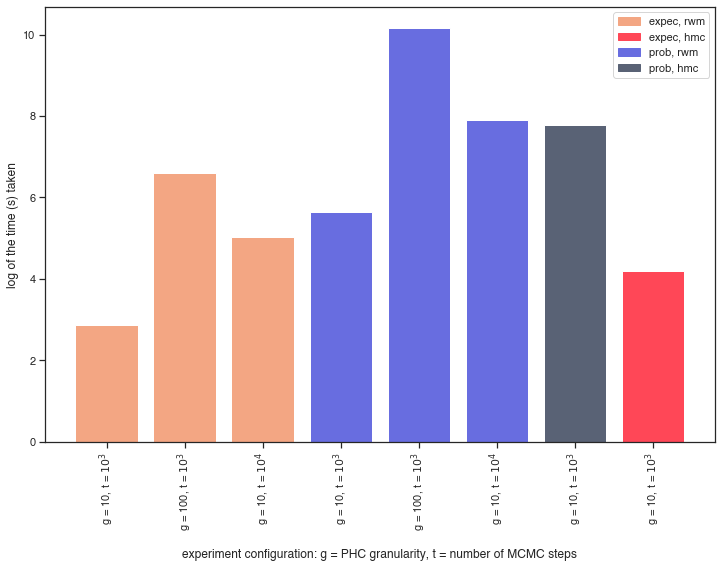

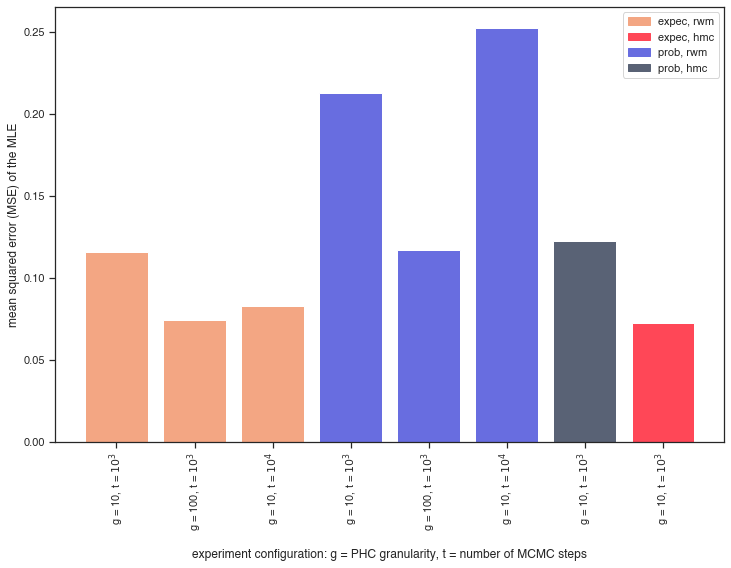

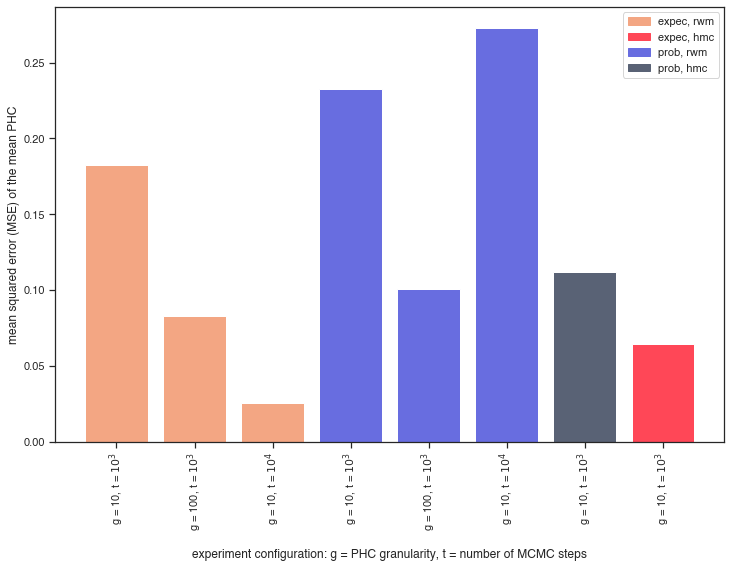

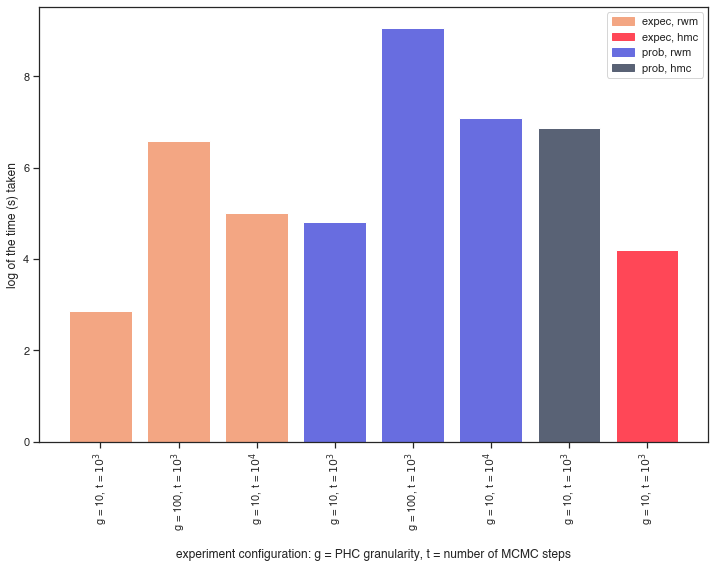

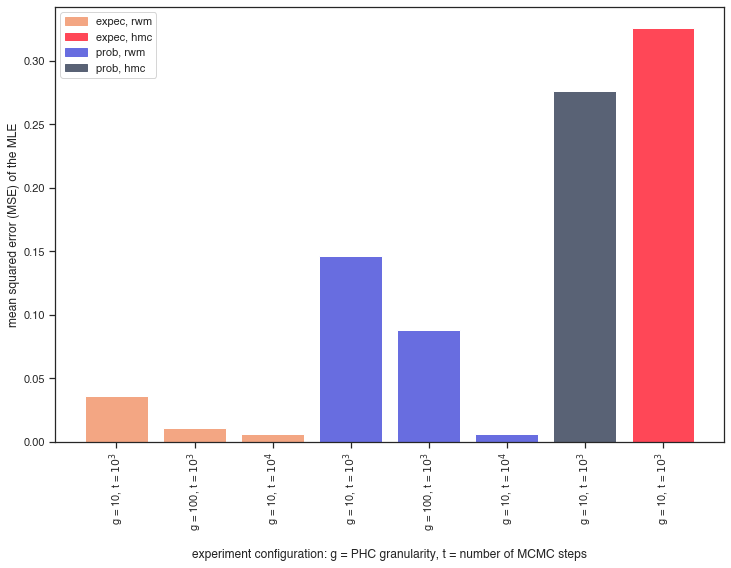

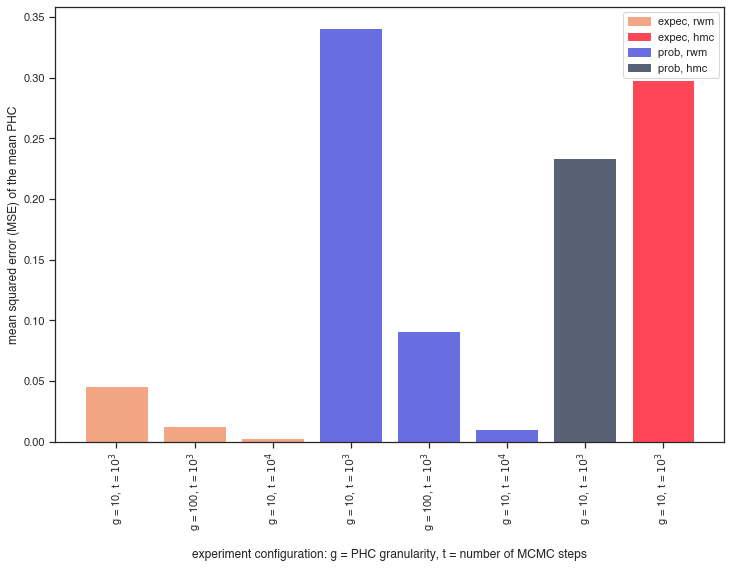

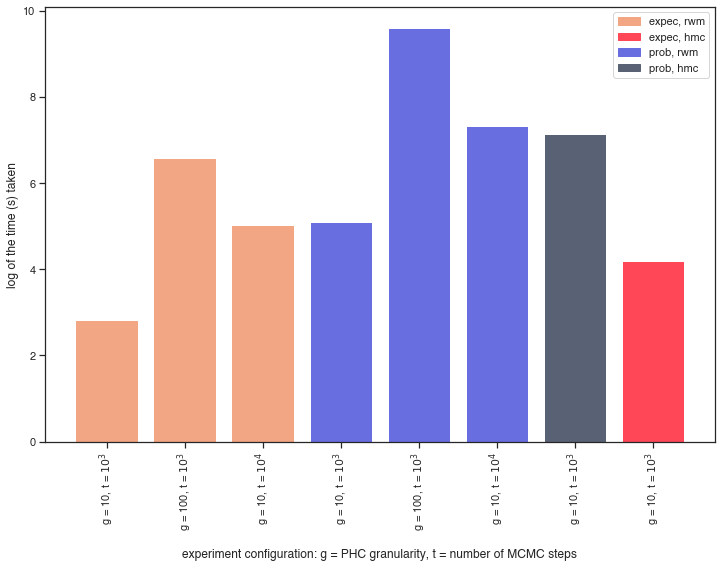

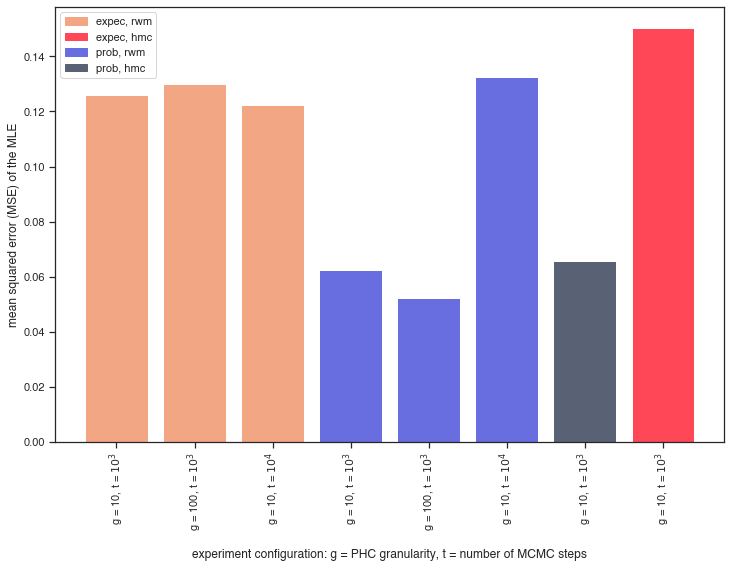

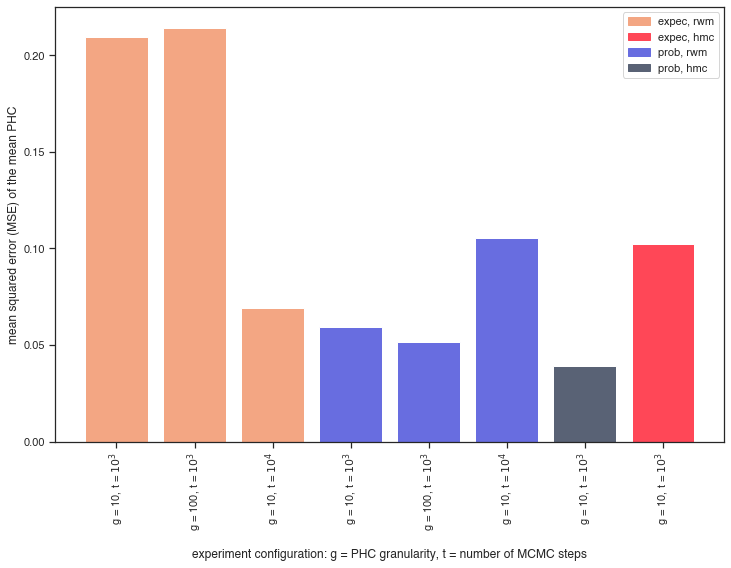

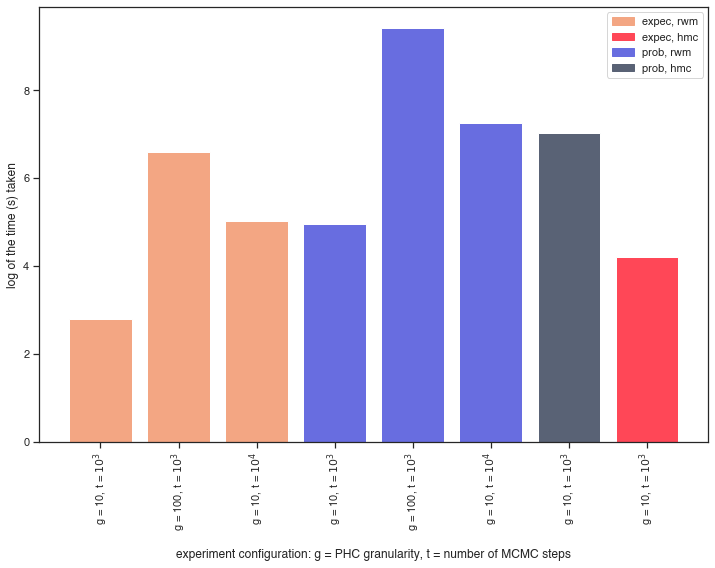

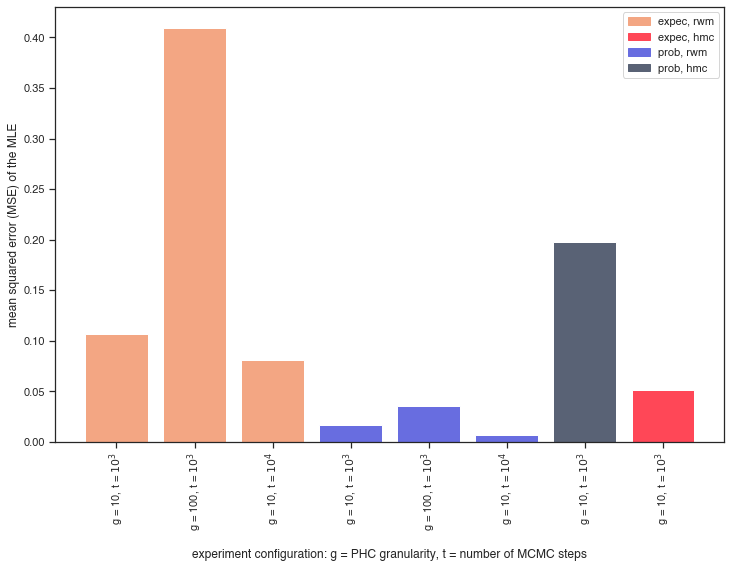

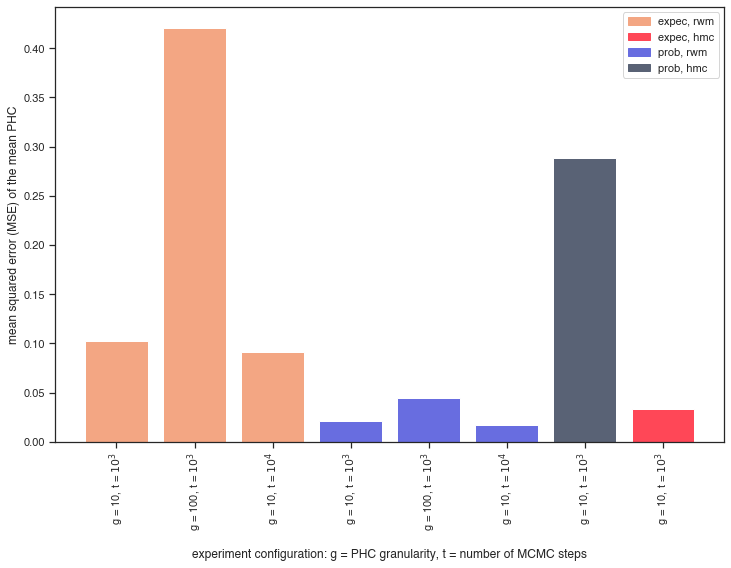

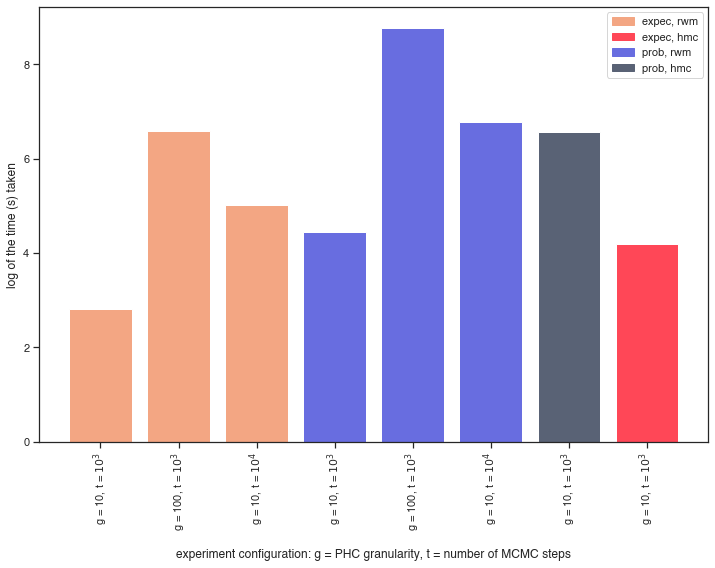

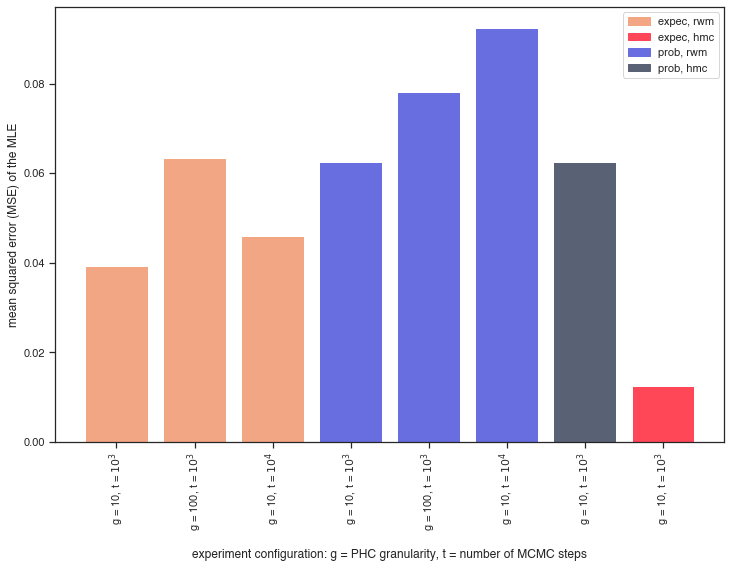

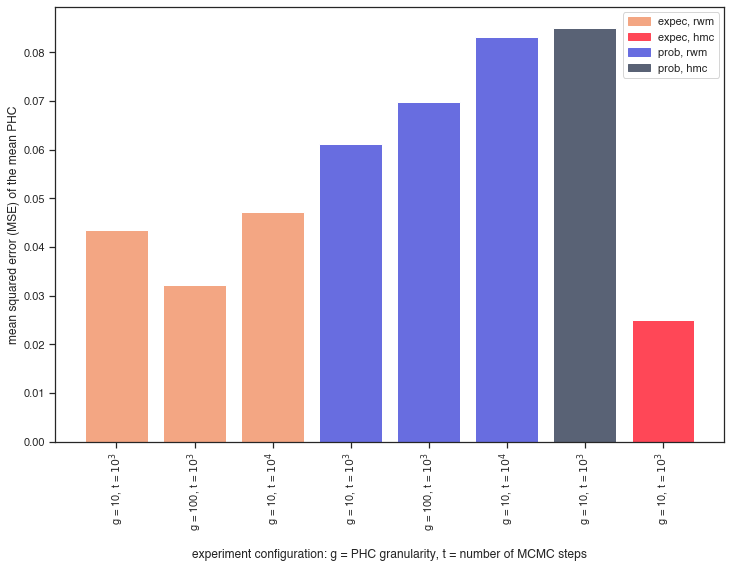

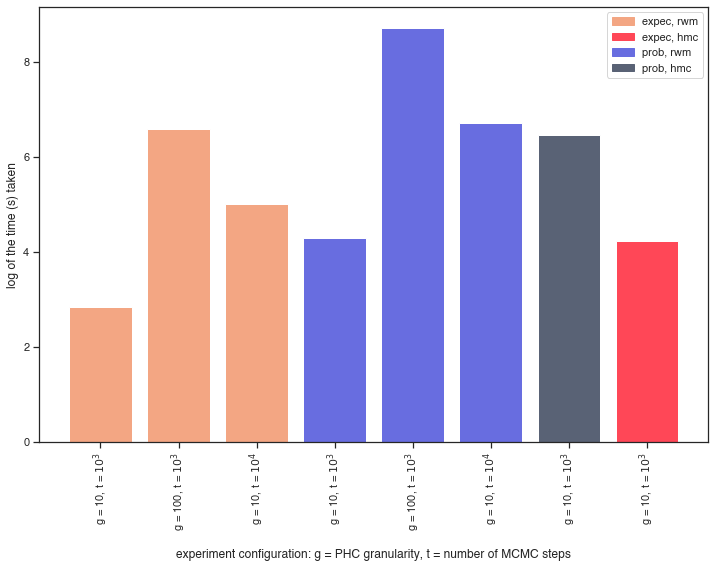

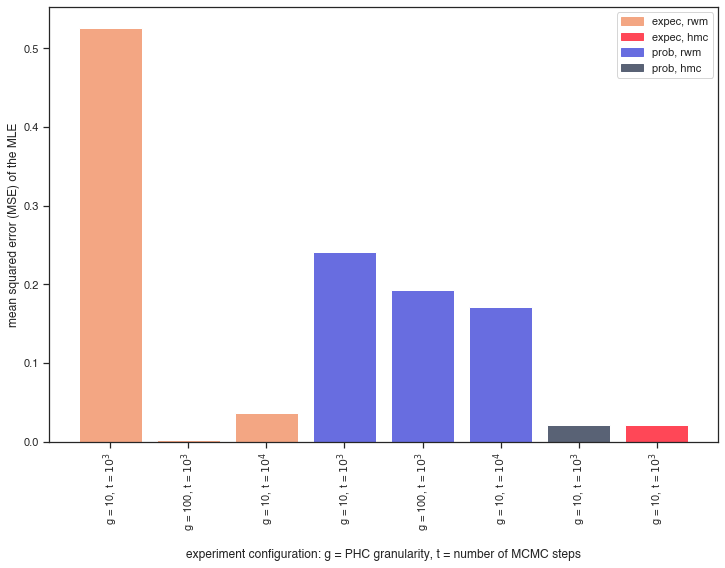

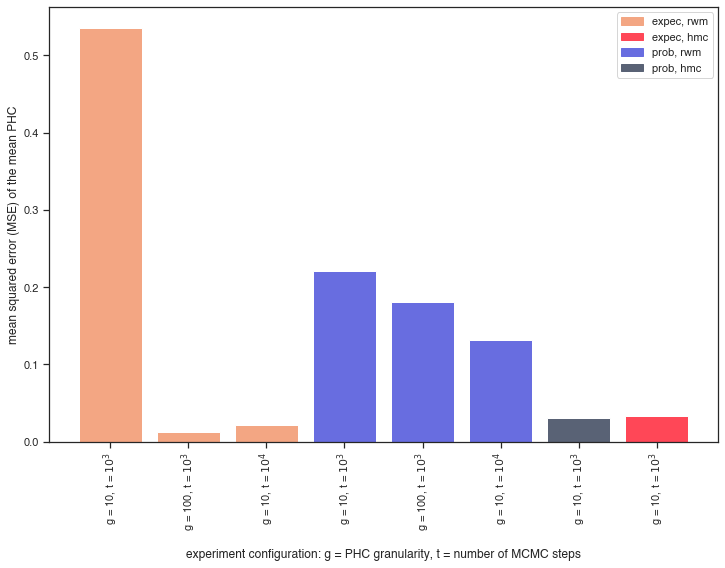

[None, None, None, None, None, None]

In [338]:
[plot_exper_results(exper_2d, label, save=True) for label in exper_2d['label'].unique()]

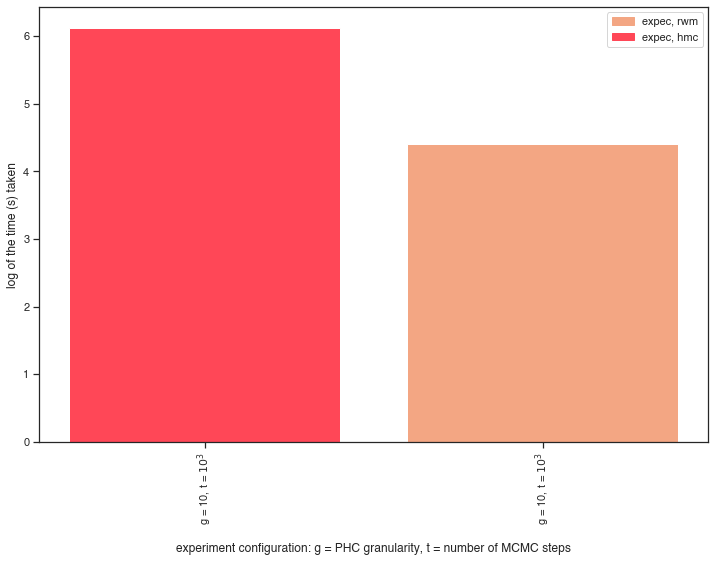

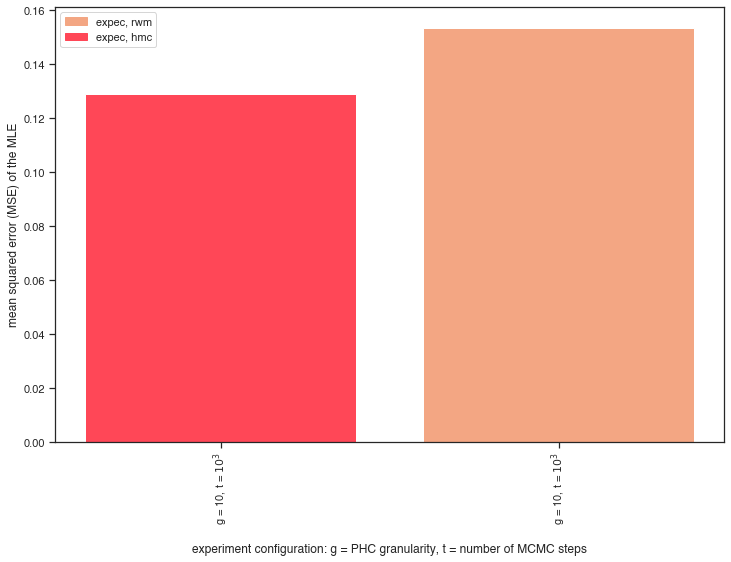

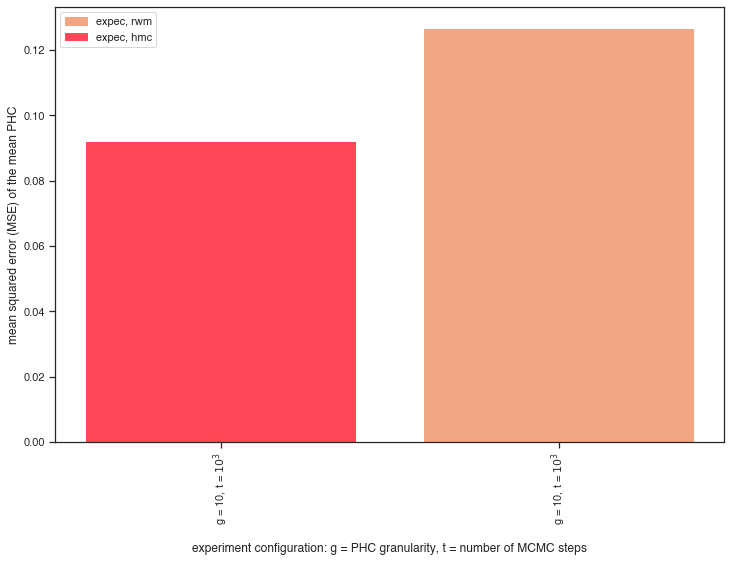

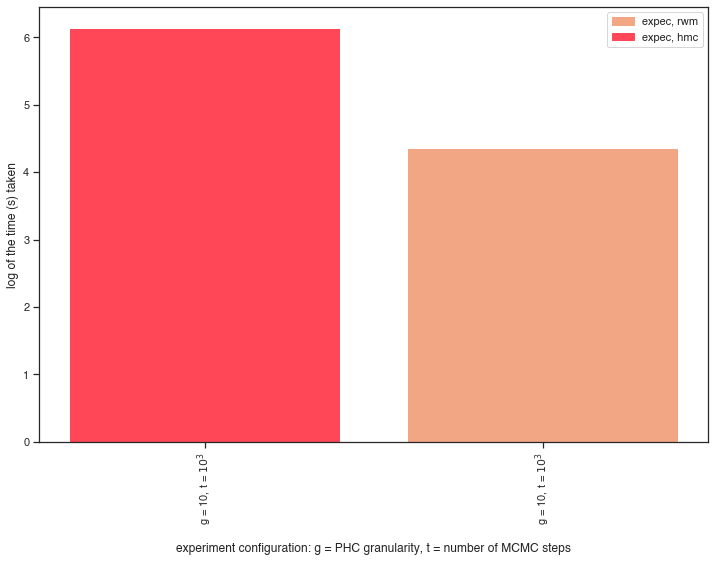

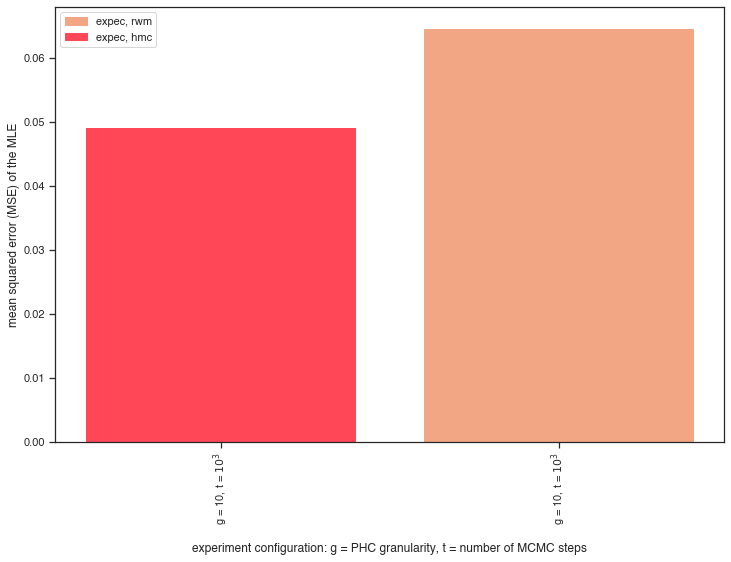

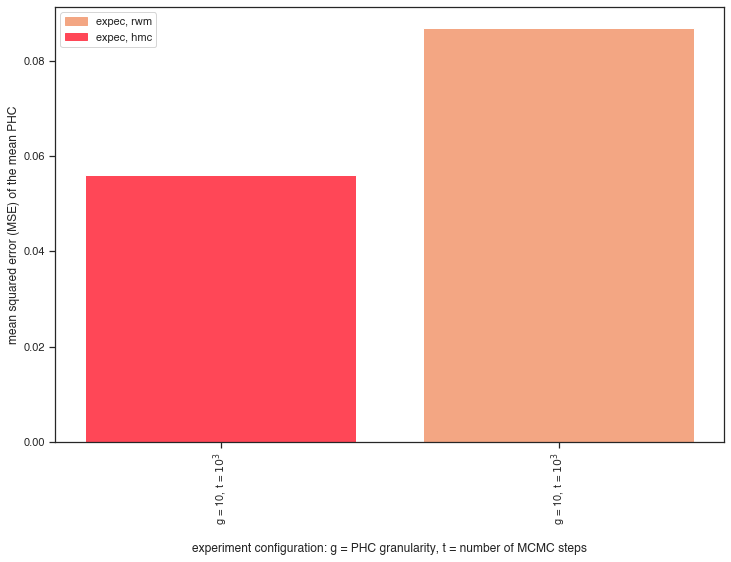

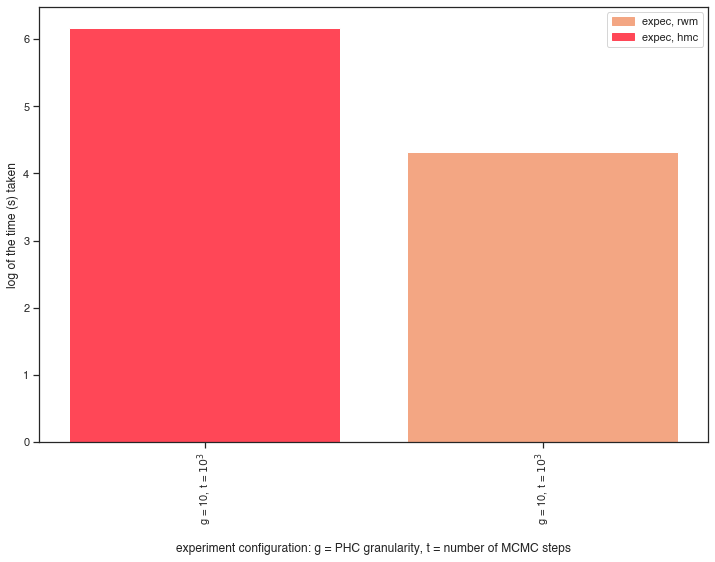

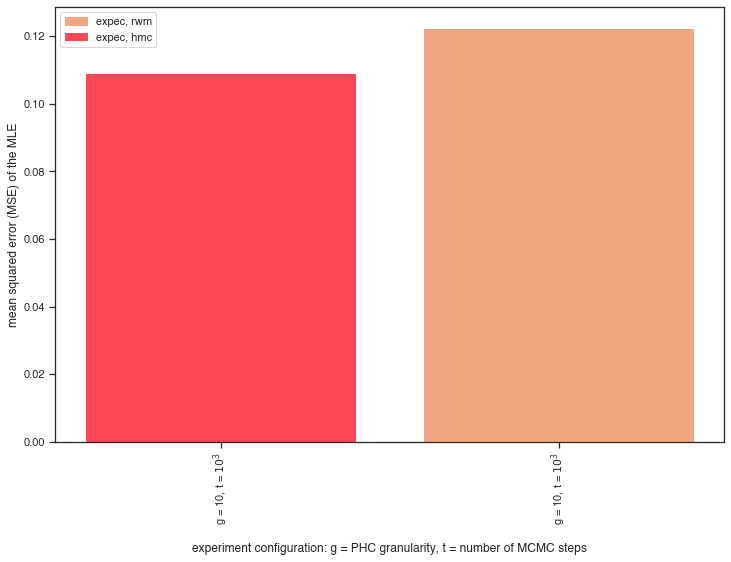

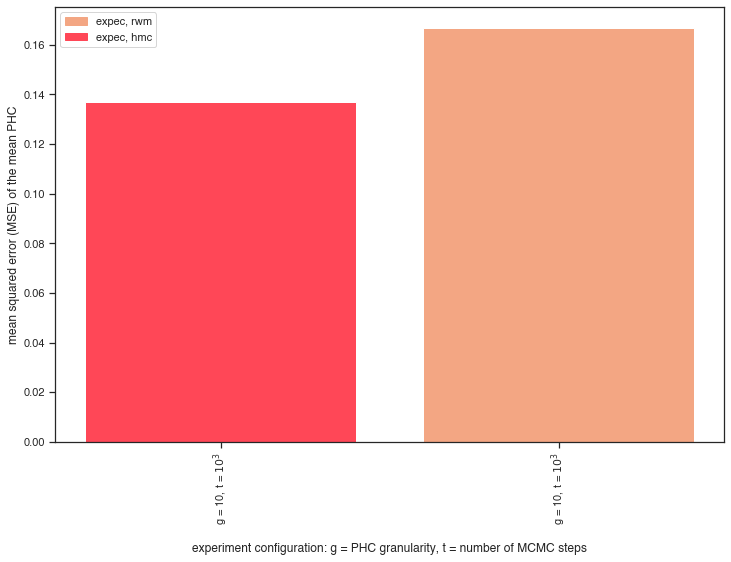

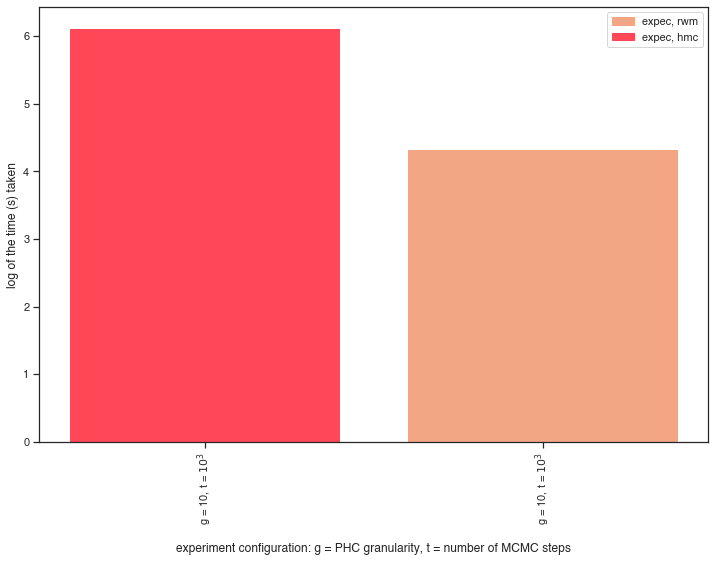

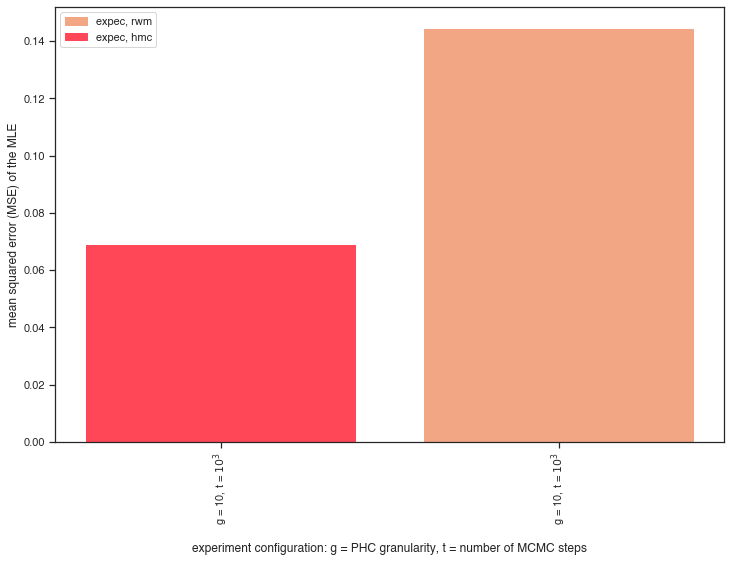

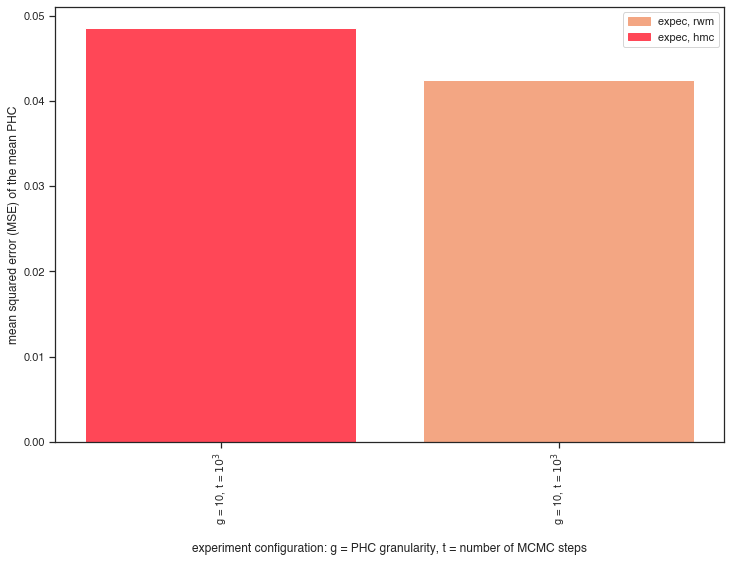

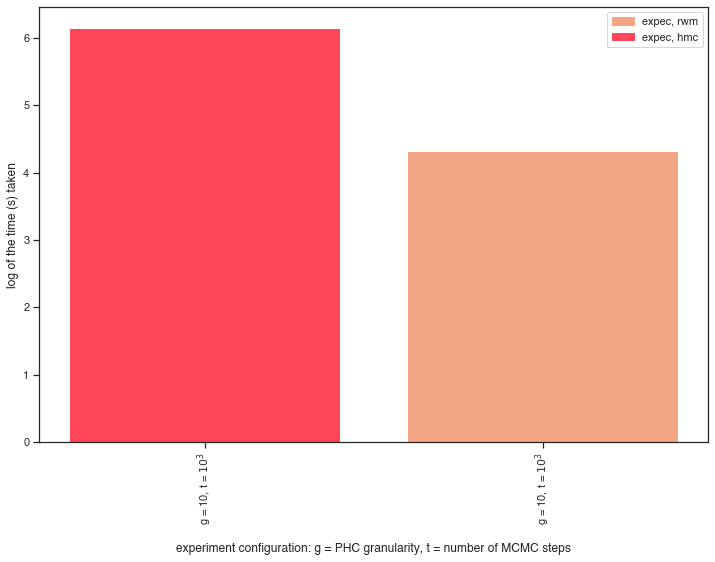

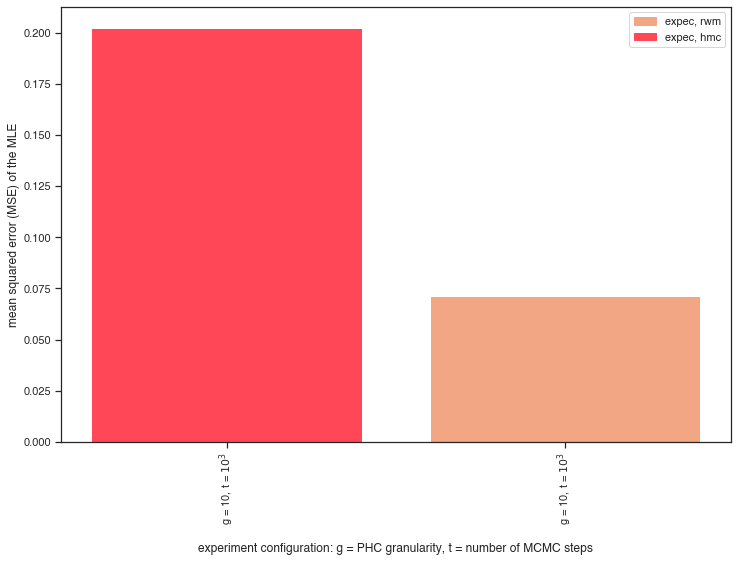

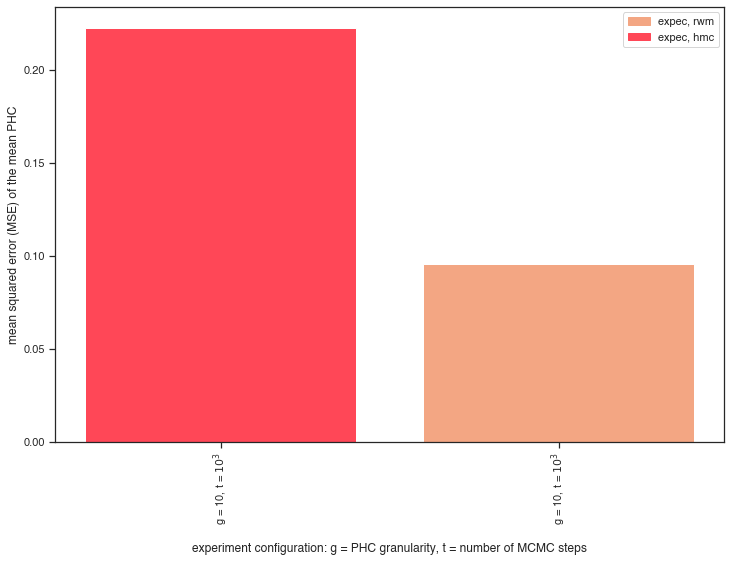

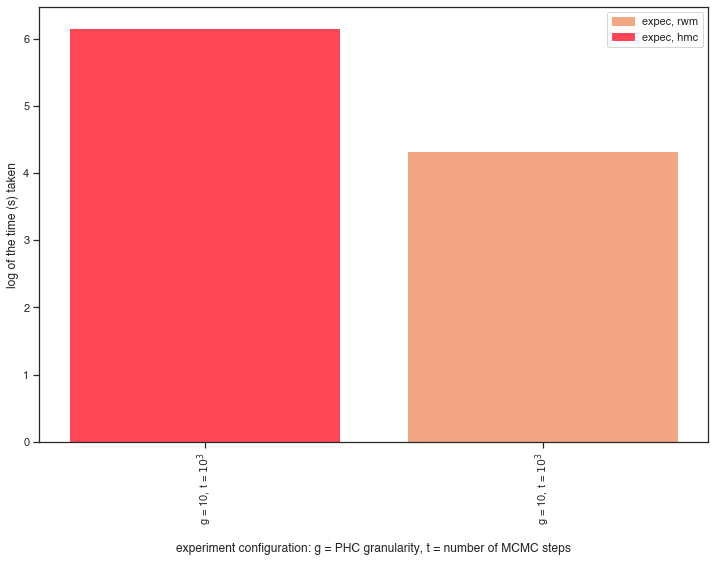

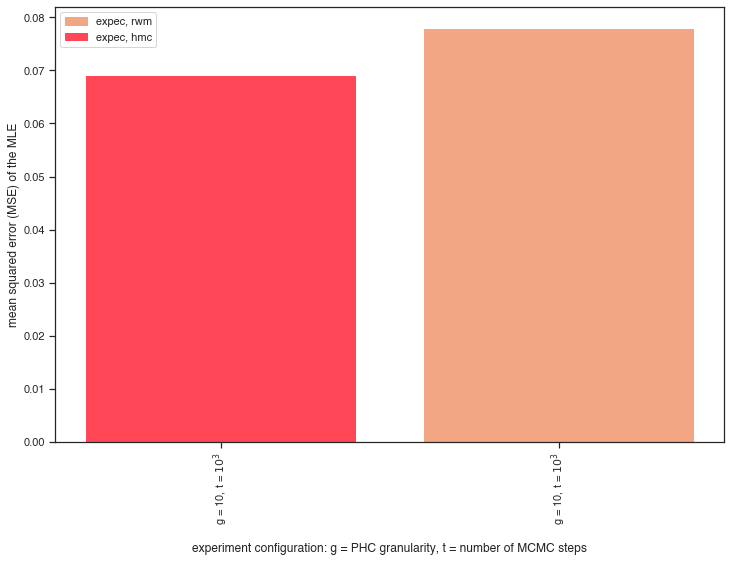

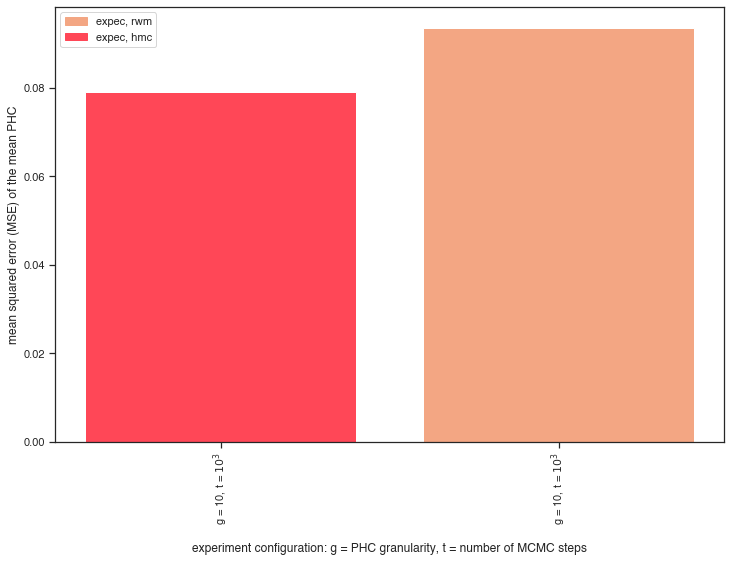

[None, None, None, None, None, None]

In [339]:
[plot_exper_results(exper_3d, label, save=True, elec_2d=False) for label in exper_3d['label'].unique()]

## Chicago

In [278]:
import expec_votes as ev
import prob_votes as pv

In [301]:
importlib.reload(dvm)
importlib.reload(dvm_eval)
importlib.reload(elect)

<module 'elect' from '/Users/hakeemangulu/Google Drive/Academic/Senior Spring/Thesis/thesis/code/elect.py'>

### Import data and create election objects

In [269]:
chi_mayor_2011 = pd.read_csv('electoral_data/chi_mayor_2011.csv')

In [270]:
chi_demo = pd.read_csv('electoral_data/chicago_demo.csv')

In [302]:
testybn = elect.create_elections(chi_mayor_2011, chi_demo, "chi_mayor_2011")

In [303]:
testybn

A real election with 6 candidates in a district with 2066 precincts and 5 demographic groups.

In [304]:
testybn.winner

'Emanuel'

In [271]:
full_chi_mayor_2011 = elect.create_elections(chi_mayor_2011, chi_demo, "chi_mayor_2011", full_map=True)

In [272]:
prec_chi_mayor_2011 = elect.create_elections(chi_mayor_2011, chi_demo, "chi_mayor_2011", full_map=False)

In [273]:
chi_mayor_2015 = pd.read_csv('electoral_data/chi_mayor_2015.csv')

In [274]:
full_chi_mayor_2015 = elect.create_elections(chi_mayor_2015, chi_demo, "chi_mayor_2015", full_map=True)

In [275]:
chi_mayor_2019 = pd.read_csv('electoral_data/chi_mayor_2019.csv')

In [276]:
full_chi_mayor_2019 = elect.create_elections(chi_mayor_2019, chi_demo, "chi_mayor_2019", full_map=True)

### Run the DVM on the data

#### Mayor 2011

In [306]:
chi_demo_clip = chi_demo.drop(['asian', 'other'], axis=1)

In [307]:
chi_mayor_2015_clip = chi_mayor_2015[['prec_id', 'Emanuel', 'Garcia']]

In [308]:
chi_mayor_2019_clip = chi_mayor_2019[['prec_id', 'Lightfoot', 'Preckwinkle']]

In [309]:
clip_chi_mayor_2015 = elect.create_elections(chi_mayor_2015_clip, chi_demo_clip, "chi_mayor_2015")

In [310]:
clip_chi_mayor_2019 = elect.create_elections(chi_mayor_2019_clip, chi_demo_clip, "chi_mayor_2019")

In [321]:
import importlib
importlib.reload(dvm)
importlib.reload(ev)
importlib.reload(elect)

<module 'elect' from '/Users/hakeemangulu/Google Drive/Academic/Senior Spring/Thesis/thesis/code/elect.py'>

In [322]:
tetstu = dvm.dvm_elections(clip_chi_mayor_2015, expec_scoring=True, n_steps=100, verbose=True)

The Random Walk Metropolis chain will be run in 10 chunks of size 10, with 0 steps at the end.

[1/3] Running the chain on 10 chunks of 10 iterations each...


NotImplementedError: Caching devices is not yet supported when eager execution is enabled.

In [281]:
full_chi_mayor_2011_results = dvm.dvm_elections(full_chi_mayor_2011, expec_scoring=True, n_steps=1000)

TypeError: in converted code:


    TypeError: tf__prob_from_expec() got an unexpected keyword argument 'rwm'


In [235]:
chi_mayor_2011_mle = dvm.chain_mle(full_chi_mayor_2011_results[0]['chain_results'])[0]

In [224]:
chi_mayor_2011_mean_phc = dvm.mean_phc(full_chi_mayor_2011_results[0]['chain_results'])

In [239]:
chi_mayor_2011_vpcts_mle = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2011_mle), 
                                               10, 
                                               full_chi_mayor_2011[0].demo)

In [244]:
full_chi_mayor_2011[0].candidates

['Emanuel', 'DelValle', 'Braun', 'Chico', 'Watkins', 'Walls']

In [240]:
chi_mayor_2011_vpcts_mle

{'black': <tf.Tensor: shape=(), dtype=float32, numpy=0.85>,
 'hispanic': <tf.Tensor: shape=(), dtype=float32, numpy=0.45>,
 'asian': <tf.Tensor: shape=(), dtype=float32, numpy=0.35>,
 'white': <tf.Tensor: shape=(), dtype=float32, numpy=0.15>,
 'other': <tf.Tensor: shape=(), dtype=float32, numpy=0.15>}

In [250]:
full_chi_mayor_2011_results = dvm.dvm_elections(full_chi_mayor_2011, candidate='DelValle', expec_scoring=True, n_steps=1000)

In [251]:
chi_mayor_2011_mle = dvm.chain_mle(full_chi_mayor_2011_results[0]['chain_results'])[0]

In [252]:
chi_mayor_2011_mean_phc = dvm.mean_phc(full_chi_mayor_2011_results[0]['chain_results'])

In [253]:
chi_mayor_2011_vpcts_mle = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2011_mle), 
                                               10, 
                                               full_chi_mayor_2011[0].demo)

In [239]:
chi_mayor_2011_vpcts_mean = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2011_mean_phc), 
                                                10, 
                                                full_chi_mayor_2011[0].demo)

In [254]:
chi_mayor_2011_vpcts_mle

{'black': <tf.Tensor: shape=(), dtype=float32, numpy=0.05>,
 'hispanic': <tf.Tensor: shape=(), dtype=float32, numpy=0.15>,
 'asian': <tf.Tensor: shape=(), dtype=float32, numpy=0.35>,
 'white': <tf.Tensor: shape=(), dtype=float32, numpy=0.25>,
 'other': <tf.Tensor: shape=(), dtype=float32, numpy=0.85>}

In [240]:
chi_mayor_2011_vpcts_mean

{'black': <tf.Tensor: shape=(), dtype=float32, numpy=0.85>,
 'hispanic': <tf.Tensor: shape=(), dtype=float32, numpy=0.45>,
 'asian': <tf.Tensor: shape=(), dtype=float32, numpy=0.35>,
 'white': <tf.Tensor: shape=(), dtype=float32, numpy=0.15>,
 'other': <tf.Tensor: shape=(), dtype=float32, numpy=0.15>}

#### Mayor 2015

In [205]:
full_chi_mayor_2015_results = dvm.dvm_elections(full_chi_mayor_2015, expec_scoring=True, n_steps=1000)

In [236]:
chi_mayor_2015_mle = dvm.chain_mle(full_chi_mayor_2015_results[0]['chain_results'])[0]

In [226]:
chi_mayor_2015_mean_phc = dvm.mean_phc(full_chi_mayor_2015_results[0]['chain_results'])

In [243]:
full_chi_mayor_2015[0].candidates

['Emanuel', 'Wilson', 'Fioretti', 'Garcia', 'Walls']

In [242]:
chi_mayor_2015_vpcts_mle

{'black': <tf.Tensor: shape=(), dtype=float32, numpy=0.65>,
 'hispanic': <tf.Tensor: shape=(), dtype=float32, numpy=0.65>,
 'asian': <tf.Tensor: shape=(), dtype=float32, numpy=0.75>,
 'white': <tf.Tensor: shape=(), dtype=float32, numpy=0.35>,
 'other': <tf.Tensor: shape=(), dtype=float32, numpy=0.35>}

In [255]:
full_chi_mayor_2015_results = dvm.dvm_elections(full_chi_mayor_2015, candidate='Wilson', expec_scoring=True, n_steps=1000)

In [256]:
chi_mayor_2015_mle = dvm.chain_mle(full_chi_mayor_2015_results[0]['chain_results'])[0]

In [257]:
chi_mayor_2015_mean_phc = dvm.mean_phc(full_chi_mayor_2015_results[0]['chain_results'])

In [258]:
chi_mayor_2015_vpcts_mle = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2015_mle), 
                                               10, 
                                               full_chi_mayor_2011[0].demo)

In [258]:
chi_mayor_2015_vpcts_mle = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2015_mle), 
                                               10, 
                                               full_chi_mayor_2011[0].demo)

In [260]:
chi_mayor_2015_vpcts_mle

{'black': <tf.Tensor: shape=(), dtype=float32, numpy=0.95>,
 'hispanic': <tf.Tensor: shape=(), dtype=float32, numpy=0.45>,
 'asian': <tf.Tensor: shape=(), dtype=float32, numpy=0.85>,
 'white': <tf.Tensor: shape=(), dtype=float32, numpy=0.55>,
 'other': <tf.Tensor: shape=(), dtype=float32, numpy=0.15>}

#### Mayor 2019

In [206]:
full_chi_mayor_2019_results = dvm.dvm_elections(full_chi_mayor_2019, expec_scoring=True, n_steps=1000)

In [237]:
chi_mayor_2019_mle = dvm.chain_mle(full_chi_mayor_2019_results[0]['chain_results'])[0]

In [228]:
chi_mayor_2019_mean_phc = dvm.mean_phc(full_chi_mayor_2019_results[0]['chain_results'])

In [241]:
chi_mayor_2015_vpcts_mle = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2015_mle), 
                                               10, 
                                               full_chi_mayor_2015[0].demo)

In [245]:
chi_mayor_2019_vpcts_mle = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2019_mle), 
                                               10, 
                                               full_chi_mayor_2019[0].demo)

In [246]:
full_chi_mayor_2019[0].candidates

['Joyce',
 'Vallas',
 'Wilson',
 'Preckwinkle',
 'Daley',
 'Mccarthy',
 'Chico',
 'Mendoza',
 'Enyia',
 'Ford',
 'Salesgriffin',
 'Lightfoot',
 'Fioretti',
 'Kozlar']

In [247]:
chi_mayor_2019_vpcts_mle

{'black': <tf.Tensor: shape=(), dtype=float32, numpy=0.95>,
 'hispanic': <tf.Tensor: shape=(), dtype=float32, numpy=0.95>,
 'asian': <tf.Tensor: shape=(), dtype=float32, numpy=0.25>,
 'white': <tf.Tensor: shape=(), dtype=float32, numpy=0.55>,
 'other': <tf.Tensor: shape=(), dtype=float32, numpy=0.65>}